<a href="https://colab.research.google.com/github/sanjana19991118/python_ml/blob/main/Attirbut_Transformation_%26_Feature_Scalling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# Import the libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


In [17]:
# Load the wine quality dataset
df_wine = pd.read_csv("/content/winequality-red.csv")

X = df_wine.drop("quality", axis=1)
y = df_wine["quality"]

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [18]:
# split the data into training and testing dataset
# This ensure we train the model on one portion of data and test on unseen data

X_train_raw, X_test_raw, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

# test_size=0.25 means 25% of data goes to testing, 75% to training
# random_state ensures reproducibility



In [19]:
# Apply Min-Max Normalization
# Min-Max Scaler scales all features values between 0 and 1
# Useful when you want to preserve shape and not assume Gaussian distribution

nm = MinMaxScaler()

In [20]:
# Fit the scaler on training data and transform both train and test
X_train_nm = nm.fit_transform(X_train_raw)
X_test_nm = nm.transform(X_test_raw)



In [21]:
# Apply z-score Standarization

# Z-score scaling(standardScaler) transforms features to have:
# - Mean = 0
# - Standard Deviation = 1
# Useful when features have different scales or units

ss = StandardScaler()

#Fit and transform the training set; transform the test set
X_train_ss = ss.fit_transform(X_train_raw)
X_test_ss = ss.transform(X_test_raw)





In [22]:
# define KNN evaluation function
# to train and evaluate KNN

def eval_knn(X_train, X_test):
  # Create KNN model with k=5
  knn = KNeighborsClassifier(n_neighbors=5)

  # Fit model on training data
  knn.fit(X_train, y_train)

  #Return model accuracy on test data
  return knn.score(X_test, y_test)






In [23]:
# Evaluate the KNN classifer using different versions of the data
# KNN is a distance-based algorithm - scaling impacts performace significantly

print("Raw KNN accuracry", eval_knn(X_train_raw, X_test_raw)) # without scalling
print("Min Max scaled accuracy", eval_knn(X_train_nm, X_test_nm)) # with scalling
print("Z-score scaled accuracy", eval_knn(X_train_ss, X_test_ss)) # Z-scaled sclling



Raw KNN accuracry 0.4675
Min Max scaled accuracy 0.55
Z-score scaled accuracy 0.5775


In [24]:
# Visualize the impact of scaling on KNN accuracy

import matplotlib.pyplot as plt

# create labels and accuracy list
methods = ['Raw', 'Min-Max', 'Z-score']
accuracies = [eval_knn(X_train_raw, X_test_raw), eval_knn(X_train_nm, X_test_nm), eval_knn(X_train_ss, X_test_ss)]

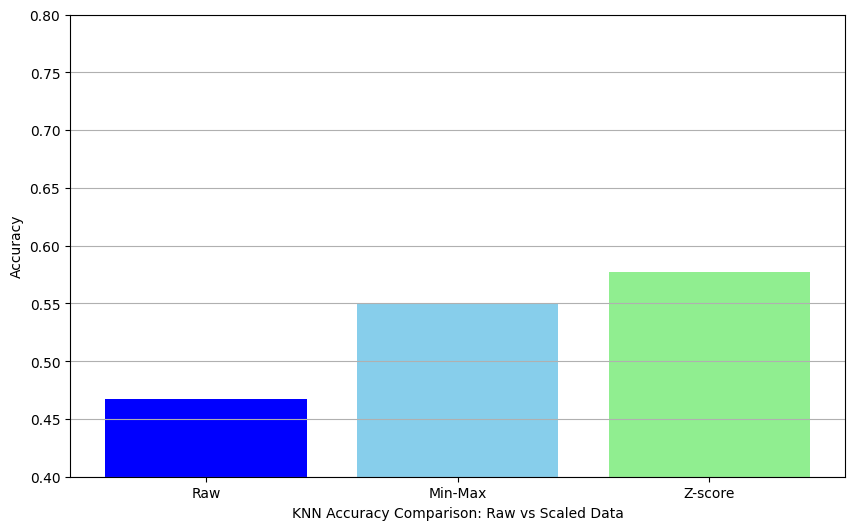

In [25]:
# create bar chart

plt.figure(figsize=(10,6))
plt.bar(methods, accuracies, color=['blue', 'skyblue', 'lightgreen'])
plt.xlabel("KNN Accuracy Comparison: Raw vs Scaled Data")
plt.ylabel('Accuracy')
plt.ylim(0.4, 0.8)
plt.grid(axis='y')
plt.show()



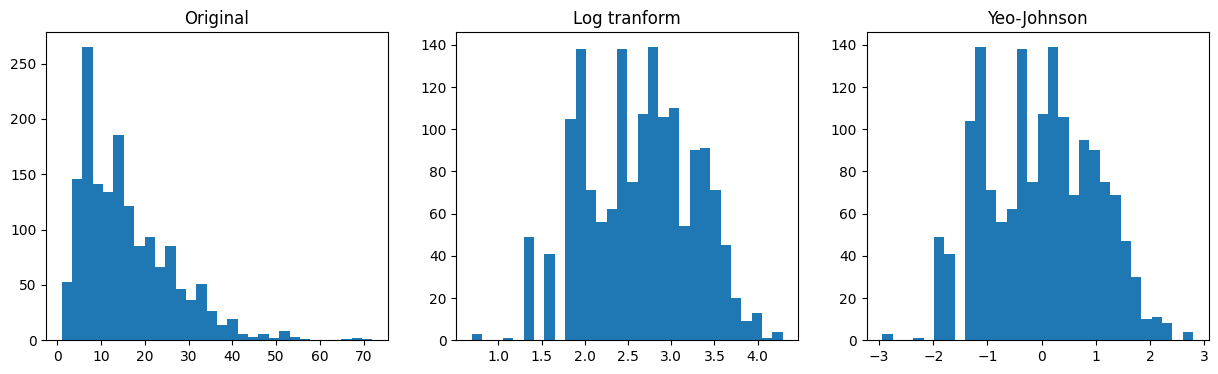

In [27]:
from sklearn.preprocessing import PowerTransformer

# Log transform of right-skewed 'free sulfer diaoxide'
X['log_freesulfur'] = np.log1p(X['free sulfur dioxide'])

# Box-Cox requires positive values
pt = PowerTransformer(method='yeo-johnson')
X['yb_freesulfur'] = pt.fit_transform(X[['free sulfur dioxide']])

# Compare distributions
fig, axes = plt.subplots(1,3, figsize=(15,4))
axes[0].hist(X['free sulfur dioxide'], bins=30); axes[0].set_title('Original')
axes[1].hist(X['log_freesulfur'], bins=30); axes[1].set_title('Log tranform')
axes[2].hist(X['yb_freesulfur'], bins=30); axes[2].set_title('Yeo-Johnson')
plt.show()
